# **Prompt**
The sports clothing and athleisure sector, valued at around $193 billion in 2021 according to [Statista](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/), is a thriving industry expected to experience significant growth in the coming decade.

Within this document, you will assume the role of a product analyst for an online sports clothing company. The company is specifically focused on enhancing **_its revenue streams_**. Your analysis will delve into various aspects of product data, including pricing, reviews, descriptions, ratings, as well as revenue and website traffic. The goal is to formulate recommendations aimed at improving the company's marketing and sales strategies.

These four datasets are provided to investigate:

## brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

## finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

## info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

## reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |


# **Business Objective:**

The primary objective is to gain actionable insights into the market dynamics and product strategies employed by Nike and Adidas. By addressing specific questions related to pricing, discounts, customer reviews, product descriptions, review trends, and revenue breakdown, the goal is to equip stakeholders with valuable information for strategic decision-making.

# **Goal**
This analysis aims to assist in identifying potential areas of improvement, understanding **consumer preferences**, and optimizing **product offerings** to enhance the overall competitiveness and **financial performance** of the respective brands.

# **Framework Analysis**
Before diving into the data sea, I'll categorize the hypotheses systematically based on our goal, establishing a structured and logical framework for thoughtful analysis.

# Data Overview

In [42]:
# Import all libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# # Show dataset information
brands.info()
finance.info()
info.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 non-null   

In [43]:
# Merge the seperated data into one and drop null values
merged_df = info.merge(finance, on="product_id")
merged_df = merged_df.merge(reviews, on="product_id")
merged_df = merged_df.merge(brands, on="product_id")
merged_df.dropna(inplace=True)

This is a dataset of **3,179** rows with **13** columns containing basic information of brands, product info, finance, and reviews. Examining the data structure revealed missing values; however, as the missing values are less than 5%, I opted to leave them out from this analysis.

## _1) Consumer Preferences:_
- ### **Q:** Does a correlation exist between revenue and reviews?
    - Why do I want to know? 
        - Explore the strength of any correlation that may exist between a product's revenue and its reviews
    - So what?     
        - Implement initiatives to encourage and incentivize customer reviews, fostering increased engagement and potentially driving higher revenues through positive customer feedback
    - Measure by?
        - revenue // reviews

- ### **Q:** Is there an influence on a product's rating and reviews based on the length of its description?
    -  Why do I want to know?
        - Explore the potential impact of product description length on customer ratings and reviews, addressing the relationship between product information and consumer perception.
    - So what?
        - If postivie, highlight product features within the optimal description length to attract and engage customers effectively
    - Measure by?
        - description // reviews // rating

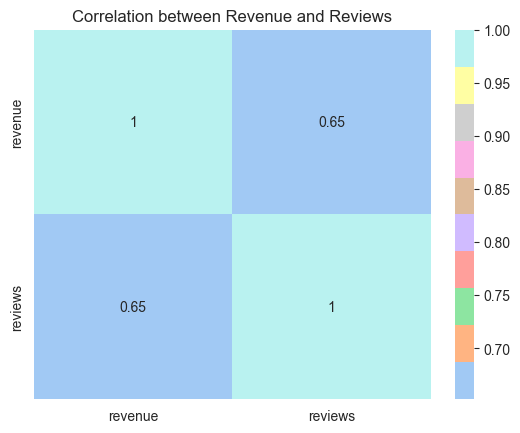

The longest description length is 687 characters.

  description_length  average_rating  num_reviews
0                100            2.26            7
1                200            3.19          526
2                300            3.28         1785
3                400            3.29          651
4                500            3.35          118
5                600            3.12           15
6                700            3.65           15


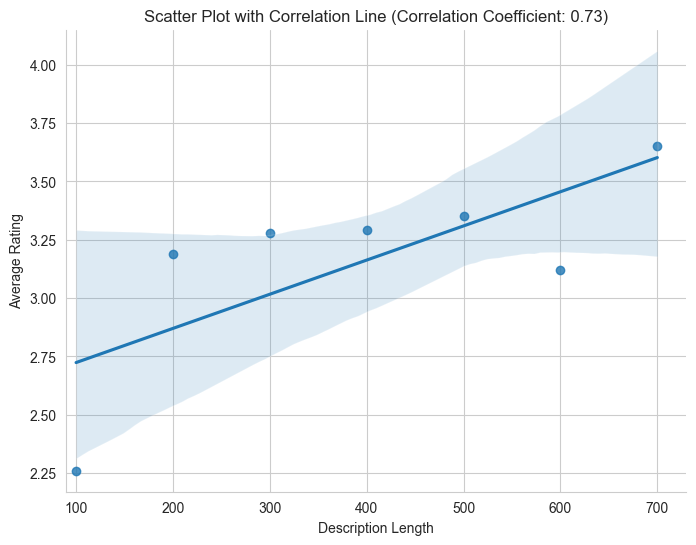

In [44]:
# 1) Consumer Preferences:
# 1) Q: Does a correlation exist between revenue and reviews?
# Calculate the correlation coefficient
revenue_reviews_corr = merged_df["revenue"].corr(merged_df["reviews"])

# Create a seaborn heatmap plot
correlation_matrix = merged_df[["revenue", "reviews"]].corr()
colors = sns.color_palette("pastel")
sns.heatmap(correlation_matrix, annot=True, cmap=colors)
plt.title("Correlation between Revenue and Reviews")
plt.show()




# 2): Is there an influence on a product's rating and reviews based on the length of its description?
# Create a new column to store the length of each description
merged_df["description_length"] = merged_df["description"].str.len()

# Check the longest description length of characters to decide the bin size
print(f"The longest description length is {max(merged_df['description_length'])} characters.\n")

# Split the product description length into bins of 100 characters
bins = [0, 100, 200, 300, 400, 500, 600, 700]
labels= [100, 200, 300, 400, 500, 600, 700]
merged_df["description_length"] = pd.cut(merged_df["description_length"], bins=bins, labels=labels)

# Group by the bins and calculate the average rating and number of reviews
description_length_df = merged_df.groupby("description_length", as_index=False).agg(
    average_rating=("rating", "mean"),
    num_reviews=("reviews", "count")
).round(2)
print(description_length_df)

# Visualize the correlation between description length and mean rating of each product using a Seaborn Regression Plot
# Convert the description_length columns from string into integer to prepare for correlation
merged_df["description_length"] = merged_df["description_length"].astype(int)

# Calculate the correlation coefficient between description length and average rating
correlation_coefficient = description_length_df["description_length"].corr(description_length_df["average_rating"])

# Create a regression plot to visualize the correlation between description length and mean rating
plt.figure(figsize=(8, 6))
sns.regplot(x="description_length", y="average_rating", data=description_length_df)
plt.title(f"Scatter Plot with Correlation Line (Correlation Coefficient: {correlation_coefficient:.2f})")
plt.xlabel("Description Length")
plt.ylabel("Average Rating")
plt.xlim(90)
sns.despine()
plt.show()

## **Findings:**
1. A correlation coefficient of 0.65 could be interpreted as either a "good" or "moderate" correlation. Therefore, there is a positive correlation between revenue and reviews, suggesting that products with higher reviews tend to generate higher revenue.
2. The correlation coefficient of 0.73 indicates the strength and direction of the linear relationship between description length and the average rating.

## **Recommendation:**
- Leverage the positive correlation observed between revenue and reviews to enhance marketing strategies, emphasizing the importance of customer reviews in promotional campaigns and product positioning.
- Consider optimizing product descriptions to a length that resonates well with customers. This could potentially lead to higher average ratings.

## _2) Product Offerings:_
- ### **Q:** Do Nike and Adidas offer differing discount amounts?
    - Why do I want to know? 
        - Aim to investigate and compare the discount strategies employed by Nike and Adidas, providing insights into their promotional approaches.
    - So what?
        - Navigate the complexities of differing discount amounts, optimizing their strategies to achieve a balance between attracting customers, maintaining brand value, and sustaining profitable operations
    - Measure by?
        - brand // discount


- ### **Q:** What distinguishes the price points between Nike and Adidas products?
    - Why do I want to know?: 
        - Focuse on understanding the comparative pricing strategies of Nike and Adidas, exploring the differences in their product price points.
    - So what? 
        - Analyze how the variations in price points may impact consumer perception, market positioning, and business strategies for Nike and Adidas
    - Measure by?
        - brand // listing_price 

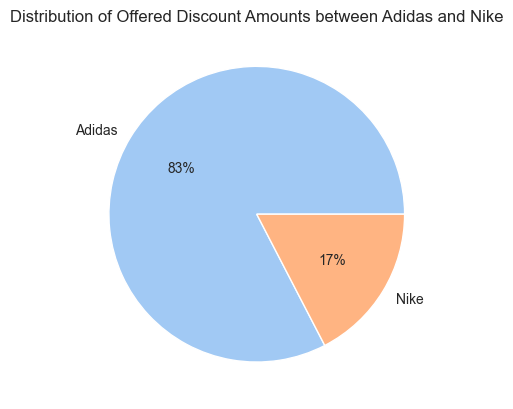

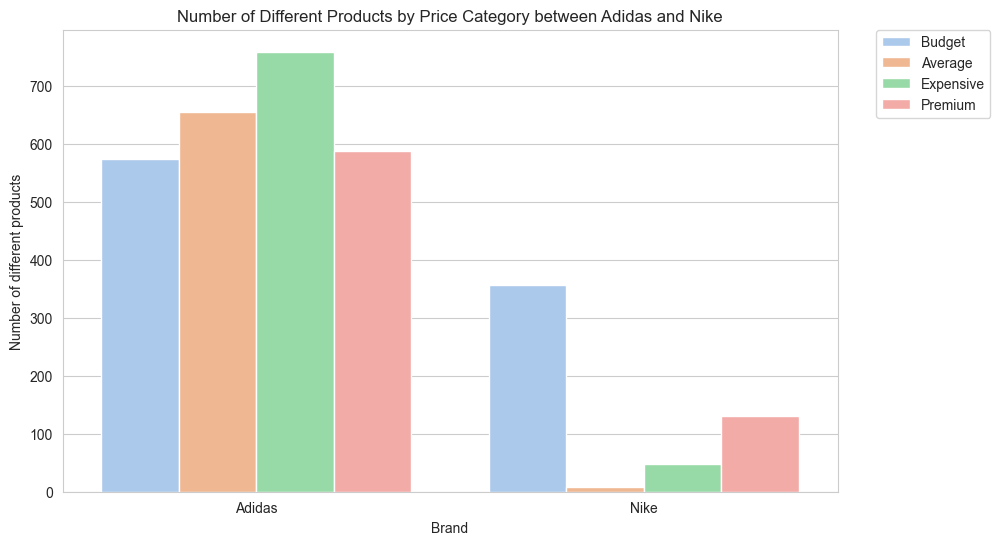

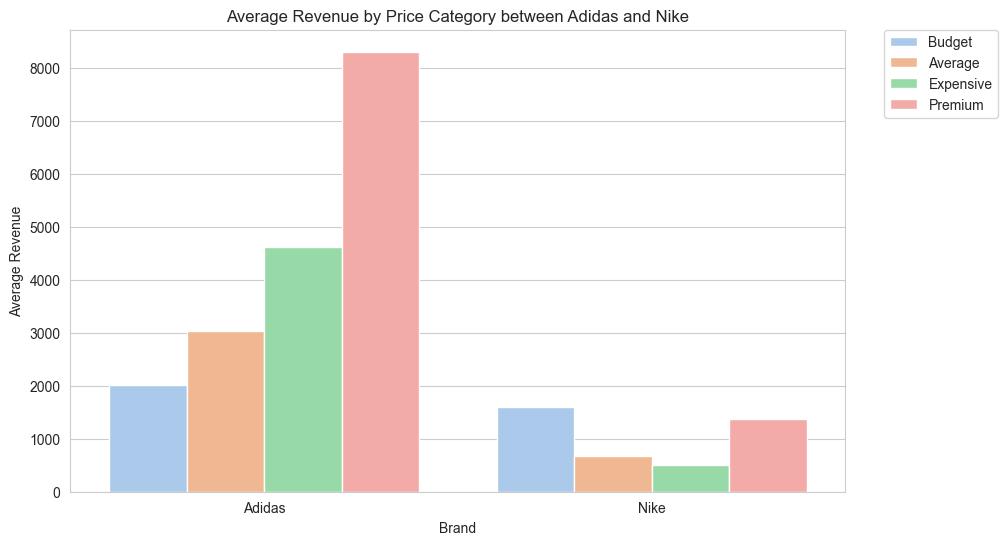

In [45]:
# 2) Product Offerings:
# 1) Q: Do Nike and Adidas offer differing discount amounts?
# Calculate the percentage of the amount of offered discounts
discount_comparison = merged_df.groupby("brand", as_index=False).agg(
    num_discounts=("discount","count"))
adidas_discount_ratio = round((discount_comparison["num_discounts"].values[0] / len(merged_df["discount"])) * 100, 2)
nike_discount_ratio = round((discount_comparison["num_discounts"].values[1] / len(merged_df["discount"])) * 100, 2)

# Display the number of discount rates by brand
labels = ["Adidas", "Nike"]
size = [adidas_discount_ratio, nike_discount_ratio]
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
plt.pie(size, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Distribution of Offered Discount Amounts between Adidas and Nike")
plt.show()




# 2) Q: What distinguishes the price points between Nike and Adidas products?
# Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite"
# Using pandas.qcut to discretize variable into equal-sized buckets
labels = ["Budget", "Average", "Expensive", "Premium"]
merged_df["price_category"] = pd.qcut(merged_df["listing_price"], q=4, labels=labels)

# Group by brand and price_category to do agg function, create new columns and get the volume and mean revenue
adidas_vs_nike = merged_df.groupby(["brand", "price_category"], as_index=False).agg(
    num_products=("price_category", "count"),
    mean_revenue=("revenue", "mean")
).round(2)

# Creating a Seaborn Barplot to visualize the number of different products in the Adidas_vs_Nike DataFrame
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
sns.barplot(data=adidas_vs_nike, x="brand", y="num_products", hue="price_category", palette=colors)
plt.title("Number of Different Products by Price Category between Adidas and Nike")
plt.xlabel("Brand")
plt.ylabel("Number of different products")
plt.legend(title="Price Category", loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Creating a Seaborn Barplot to visualize the average revenue in the Adidas_vs_Nike DataFrame
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
sns.barplot(data=adidas_vs_nike, x="brand", y="mean_revenue", hue="price_category", palette=colors)
plt.title("Average Revenue by Price Category between Adidas and Nike")
plt.xlabel("Brand")
plt.ylabel("Average Revenue")
plt.legend(title = "Price Category", loc="upper right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## **Findings:**

First, the number of offered discounts from Adidas is **5 times higher** than the ones offered from Nike. Second, both brands offer products in all price categories, but Adidas has a higher number of products in every category compared to Nike. Additionally, it reveals that the _**"Premium" category**_ has the highest average revenue. These findings suggest that Nike and Adidas have distinct price points and the amount of offered discounts for their products, with Adidas offering a higher number of products across price points and potentially generating higher average revenue.

## Recommendations: 
- Analyze Nike's discount ratio in comparison to Adidas and explore opportunities to optimize discount strategies, ensuring they align with market dynamics while maintaining brand value.
- Evaluate and diversify the product categories to compete more effectively with Adidas, addressing potential gaps and increasing market share.

## _3) Financial Performance:_
- ### **Q:** How do the product categories contribute to the company's revenue? 
    - Why do I want to know? 
        - To evaluate the financial performance of different product categories and understand their contribution to overall revenue.
    - So what?
        - This information can help in adjusting inventory management strategies based on insights from each product category

- ### **Q:** How does the median revenue differ across product categories?
    - Why do I want to know? 
        - To compare the median revenue generated by different categories.
    - So what?
        - This comparison can help optimize marketing and sales efforts based on the relative performance of each category

   num_clothing_products  ...  footwear_revenue_median
0                    478  ...                   3073.3

[1 rows x 4 columns]


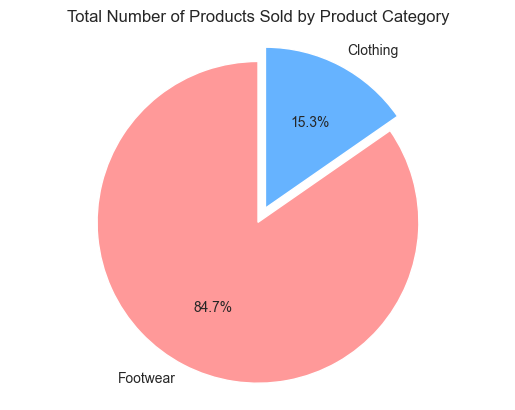

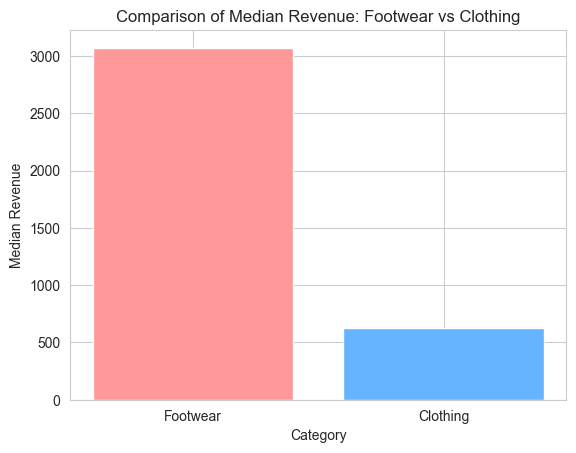

In [48]:
# 3) Financial Performance:
# 1) Q: How much of the company's stock consists of footwear items? 

# There is no column stating the type of product, so I need to rely on the "description" column
# Challenge: pattern matching -> wildcard -> https://docs.python.org/3/library/re.html#regular-expression-syntax
footwear_keyword = "shoe*|trainer*|foot*"

# Filter for footwear products
shoes = merged_df[merged_df["description"].str.contains(footwear_keyword)]

# Filter for clothing products
# How to Filter Pandas DataFrame Using Boolean Columns https://www.statology.org/pandas-filter-by-boolean-column/
clothing = merged_df[~merged_df.isin(shoes["product_id"])]

# Since it still returns all, but non-matching ones get null -> drop null
clothing.dropna(inplace=True)

# Build the product_types DataFrame, containing the number of clothing and footwear products along with their associated median revenue
product_type = pd.DataFrame({
    "num_clothing_products": len(clothing),
    "clothing_revenue_median": clothing["revenue"].median(),
    "num_footwear_products": len(shoes), 
    "footwear_revenue_median": shoes["revenue"].median(),
}, index=[0])
print(product_type)


# Visualize the data to answer: How much of the company's stock consists of footwear items?
# Calculate the total number of products
total_products = len(merged_df)

# Calculate the percentage of footwear products
footwear_percentage = len(shoes) / total_products * 100

# Calculate the percentage of clothing products
clothing_percentage = len(clothing) / total_products * 100

# Create a pie chart to visualize the distribution of product types
labels = ['Footwear', 'Clothing']
sizes = [footwear_percentage, clothing_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title("Total Number of Products Sold by Product Category")
plt.show()


# Visualize the data to answer: How does footwear's median revenue differ from clothing products?
# Create a bar plot to compare the median revenue of footwear and clothing products
plt.bar(["Footwear", "Clothing"], [shoes["revenue"].median(), clothing["revenue"].median()], color=colors)
plt.xlabel("Category")
plt.ylabel("Median Revenue")
plt.title("Comparison of Median Revenue: Footwear vs Clothing")
plt.show()

## **Findings:**

- Contribution to Company Revenue:

Footwear dominates the company's revenue, accounting for a substantial 84.7% of the total. This suggests a strong market demand for footwear products, indicating a potential area for further investment and strategic focus.
Clothing, while contributing 15.3%, is notably lower in comparison. It's important to assess the reasons behind this lower contribution and explore opportunities for growth in the clothing segment.

- Median Revenue Disparity:

The median revenue for footwear is significantly **four times higher** compared to clothing. This implies that, on average, each sale in the footwear category brings in more revenue compared to the clothing category.
The wide gap in median revenue raises questions about the pricing strategy, customer preferences, and market positioning for both product categories.

## **Recommendations:**
Given that footwear is the primary revenue driver, it is advisable to continue investing in this category. Explore opportunities to expand the footwear product line, introduce new styles, and leverage market trends to maintain or increase its market share.

While clothing contributes less to the overall revenue, it remains a valuable part of the business. Consider strategies to diversify the clothing portfolio, perhaps by introducing new designs, collaborating with influencers or designers, or identifying untapped market segments to increase its market presence.